In [1]:
import torch
import pandas as pd
from tqdm.notebook import tqdm


In [2]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/sexist_data.csv")
df.shape

(6748, 5)

In [3]:
df['text']=df['text'].str.replace('[(#@&!?)]','')

df.head(5)

C:\Users\mufdu\AppData\Local\Temp\ipykernel_39328\862735610.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[(#@&!?)]','')


,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,How about I talk shit to an idiot like you Are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [4]:
import contractions

for index, row in df.iterrows():
  row['text'] = contractions.fix(row['text'])

In [5]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

df.head(5)

C:\Users\mufdu\AppData\Local\Temp\ipykernel_39328\2779130553.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')


,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks A pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,How about I talk shit to an idiot like you Are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [6]:
df["text"] = df["text"].str.replace("URL","")
df["text"] = df["text"].str.replace("USER","")
df["text"] = df["text"].str.lower()
df.head(5)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [7]:
df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
...,...,...,...,...,...
6743,sexism2022_english-19317,another democrat with signal glassesthere is n...,sexist,2. derogation,2.1 descriptive attacks
6744,sexism2022_english-15667,that is what we do,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
6745,sexism2022_english-1400,never forget it is always the mans fault never...,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
6746,sexism2022_english-4515,it is the guys who love these instagram sluts ...,sexist,2. derogation,2.2 aggressive and emotive attacks


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 0, 'label')

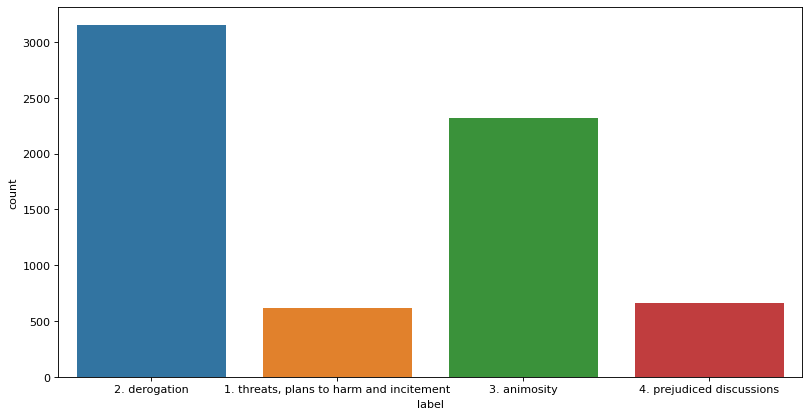

In [9]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
sns.countplot(x = df.label_category)
plt.xlabel('label')


In [10]:
df_threats= df[df['label_category']=='1. threats, plans to harm and incitement']
df_threats.shape

(618, 5)

In [11]:
df_derogation =df[df['label_category']=='2. derogation']
df_derogation.shape

(3154, 5)

In [12]:
df_animosity  =df[df['label_category']=='3. animosity']
df_animosity.shape

(2317, 5)

In [13]:
df_pre =df[df['label_category']=='4. prejudiced discussions']
df_pre.shape

(659, 5)

In [14]:
df['catt']=df['label_category'].apply(lambda x: '1' if x=='1. threats, plans to harm and incitement' else '2' if x== '2. derogation' else '3' if x== '3. animosity' else '4' )
df.sample(10)

,rewire_id,text,label_sexist,label_category,label_vector,catt
1390,sexism2022_english-14255,christian and catholic girls are the biggest s...,sexist,2. derogation,2.2 aggressive and emotive attacks,2
5766,sexism2022_english-11035,you can confirm i am a norman all the girls i ...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",3
5533,sexism2022_english-10696,you always have the option to get with a littl...,sexist,2. derogation,2.1 descriptive attacks,2
51,sexism2022_english-18984,oooooo seeing how chelsea clinton could have b...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",3
3693,sexism2022_english-6485,i heard it as the 6 of 6 6 months out of a re...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",3
4501,sexism2022_english-5660,religious girls fight as bad as any other,sexist,2. derogation,2.2 aggressive and emotive attacks,2
834,sexism2022_english-9718,trump puts on a broad on the supreme court the...,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...,4
4427,sexism2022_english-12781,thotlife select difficulty easy easy easy x200...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",3
5170,sexism2022_english-4235,churches attack divorced elderly and single mo...,sexist,3. animosity,3.2 immutable gender differences and gender st...,3
1140,sexism2022_english-9224,the best of both worlds is put in the work on ...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",3


In [15]:
from sklearn.utils import resample

In [16]:
# Upsample minority class
df_derogation_upsampled = resample(df_derogation, 
                                 replace=True,     # sample with replacement
                                 n_samples=927,    # to match majority class
                                 random_state=123) # reproducible results
 
df_animosity_upsampled = resample(df_animosity, 
                                 replace=True,     # sample with replacement
                                 n_samples=835,    # to match majority class
                                 random_state=123) # reproducible results

df_pre_upsampled = resample(df_pre, 
                                 replace=True,     # sample with replacement
                                 n_samples=710,    # to match majority class
                                 random_state=123) # reproducible results

In [17]:
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_threats, df_derogation_upsampled , df_animosity_upsampled , df_pre_upsampled])

In [18]:
df_balanced['label_category'].value_counts()

2. derogation                               927
3. animosity                                835
4. prejudiced discussions                   710
1. threats, plans to harm and incitement    618
Name: label_category, dtype: int64

In [19]:
df = df_balanced

Text(0.5, 0, 'label')

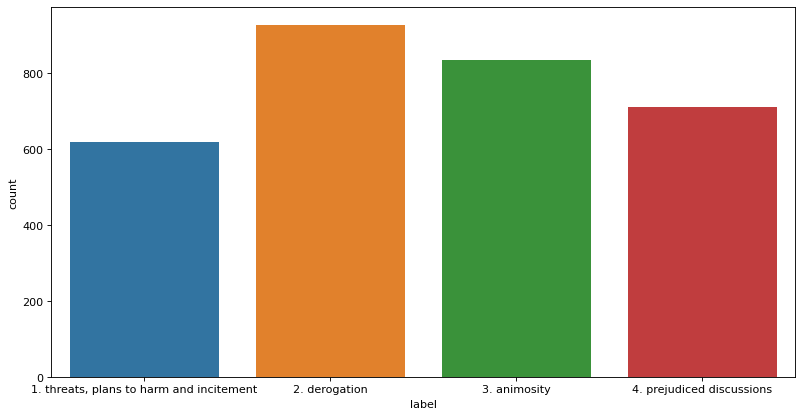

In [20]:
figure(figsize=(12, 6), dpi=80)
sns.countplot(x = df.label_category)
plt.xlabel('label')

In [21]:
# Encoding categorical data to integer labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_category'] = le.fit_transform(df['label_category'])
print(df['label_category'])

3       0
9       0
11      0
14      0
27      0
       ..
527     3
2845    3
4086    3
3833    3
6632    3
Name: label_category, Length: 3090, dtype: int32


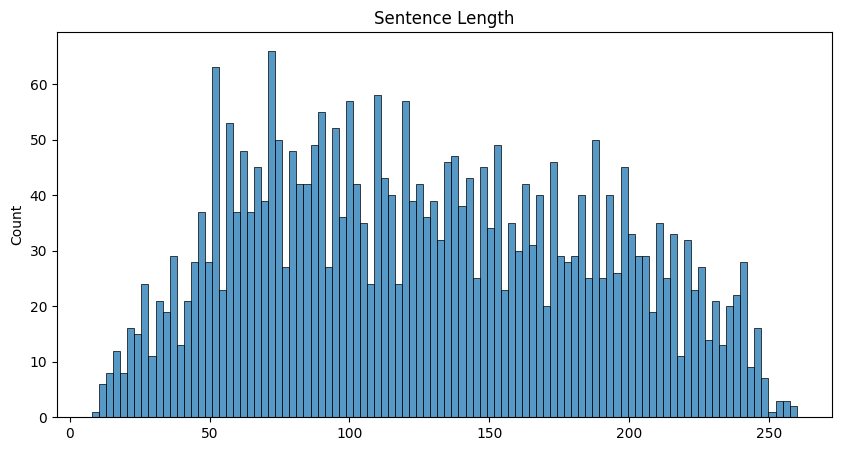

In [22]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()


In [23]:
#find the maximum length
max_len = max([len(sent) for sent in df.text])
print('Max length: ', max_len)


Max length:  260


In [24]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.label_category.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label_category.values)


In [25]:
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()


,rewire_id,text,label_sexist,label_category,label_vector,data_type
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,0,1.2 incitement and encouragement of harm,not_set
9,sexism2022_english-11481,husbands kill your piece of shit commie wives,sexist,0,1.2 incitement and encouragement of harm,not_set
11,sexism2022_english-8667,post a link with a man arguing that rape and m...,sexist,0,1.2 incitement and encouragement of harm,not_set
14,sexism2022_english-15737,shove pork down her throat,sexist,0,1.2 incitement and encouragement of harm,not_set
27,sexism2022_english-16704,buy the ring insure it let her wear it for awh...,sexist,0,1.2 incitement and encouragement of harm,not_set


In [26]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'


In [27]:
df.groupby(['label_category', 'data_type']).count()


rewire_id  text  label_sexist  label_vector
label_category data_type                                             
0              train            525   525           525           525
               val               93    93            93            93
1              train            761   761           761           761
               val              166   166           166           166
2              train            673   673           673           673
               val              162   162           162           162
3              train            505   505           505           505
               val              205   205           205           205

TOKENIZATION

In [28]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset


In [29]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)


In [30]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [31]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


In [32]:
encoded_data_train


{'input_ids': tensor([[  101,  6616,  2014,  ...,     0,     0,     0],
        [  101, 19089,  3102,  ...,     0,     0,     0],
        [  101, 14738, 15960,  ...,     0,     0,     0],
        ...,
        [  101,  4441,  1997,  ...,     0,     0,     0],
        [  101,  2308,  2031,  ...,     0,     0,     0],
        [  101,  1037,  2450,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

ENCODING

In [33]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label_category.values)


In [34]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label_category.values)


In [35]:
input_ids_train


tensor([[  101,  6616,  2014,  ...,     0,     0,     0],
        [  101, 19089,  3102,  ...,     0,     0,     0],
        [  101, 14738, 15960,  ...,     0,     0,     0],
        ...,
        [  101,  4441,  1997,  ...,     0,     0,     0],
        [  101,  2308,  2031,  ...,     0,     0,     0],
        [  101,  1037,  2450,  ...,     0,     0,     0]])

In [36]:
attention_masks_train


tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [37]:
labels_train


tensor([0, 0, 0,  ..., 3, 3, 3], dtype=torch.int32)

In [38]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [39]:
print(len(dataset_train))
print(len(dataset_val))


2464
626


In [40]:
dataset_train


In [41]:
dataset_train.tensors


(tensor([[  101,  6616,  2014,  ...,     0,     0,     0],
         [  101, 19089,  3102,  ...,     0,     0,     0],
         [  101, 14738, 15960,  ...,     0,     0,     0],
         ...,
         [  101,  4441,  1997,  ...,     0,     0,     0],
         [  101,  2308,  2031,  ...,     0,     0,     0],
         [  101,  1037,  2450,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([0, 0, 0,  ..., 3, 3, 3], dtype=torch.int32))


SET UP BERT PRETRAINED MODEL
```
# This is formatted as code
```



In [42]:
label_dict = {'1. threats, plans to harm and incitement': 0,'2. derogation': 1, '3. animosity': 2, '4. prejudiced discussions': 3}

In [43]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [44]:
#model summary
model.config


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Create Data Loaders

In [45]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

Set Up Optimizer and Scheduler


In [46]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [47]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

Define Performance Metrics


In [48]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')


In [49]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [50]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2].type(torch.LongTensor).to(device)}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

TRAIN MODEL

In [51]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [53]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2].type(torch.LongTensor).to(device)}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.139695834223326


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.9390959769487381
F1 Score (weighted): 0.6108002830604321


Epoch 2:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.6927303609305194


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.917322900891304
F1 Score (weighted): 0.6429799855299144


Epoch 3:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.40329591939739834


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 1.2011742532253264
F1 Score (weighted): 0.6387903735270449


Epoch 4:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.21960188276640913


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 1.5300440937280655
F1 Score (weighted): 0.6890074456793502


Epoch 5:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.10300136582873756


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 1.7742944329977035
F1 Score (weighted): 0.7003885557218508


Epoch 6:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.04876021215887385


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 1.8867306739091874
F1 Score (weighted): 0.7056950531067696


Epoch 7:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.019987775727642727


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 2.0718688011169433
F1 Score (weighted): 0.6945373526526825


Epoch 8:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.01647643346851427


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 2.1096478521823885
F1 Score (weighted): 0.7030704878006729


Epoch 9:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.01278698130401797


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 2.1320534467697145
F1 Score (weighted): 0.6956887395513102


Epoch 10:   0%|          | 0/616 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.008037997557819056


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 2.142925131320953
F1 Score (weighted): 0.7055667753466486


Model Evaluation


In [54]:
outputs.loss


tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)

In [55]:
outputs.logits


tensor([[-2.8833,  6.7718, -2.3511, -2.9512],
        [-2.7572, -2.9912,  6.7341, -2.0283],
        [-2.3308,  6.9332, -3.0842, -2.9095],
        [-1.8083, -3.0654,  6.3917, -1.8993]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [56]:
#save model
model.to(device)
pass


In [57]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/20 [00:00<?, ?it/s]

In [58]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: 1. threats, plans to harm and incitement
Accuracy:85/93

Class: 2. derogation
Accuracy:113/166

Class: 3. animosity
Accuracy:91/162

Class: 4. prejudiced discussions
Accuracy:150/205



In [59]:
predictions

array([[ 6.676178 , -2.5255258, -2.0835874, -1.8371114],
       [-3.071752 ,  6.8603525, -2.0695832, -3.044447 ],
       [-4.2883296,  2.3112848, -2.9352236,  4.3579493],
       ...,
       [-3.0167718, -1.1333243,  6.108371 , -3.1423802],
       [-3.790428 ,  5.953465 , -2.6644838, -1.139375 ],
       [ 6.7153735, -1.9641387, -1.7784003, -2.9864802]], dtype=float32)

In [60]:
true_vals

array([3, 2, 3, 2, 0, 2, 2, 3, 3, 3, 2, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1, 3,
       0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 2, 2, 3,
       2, 2, 1, 3, 2, 2, 3, 3, 3, 0, 1, 3, 1, 3, 3, 0, 2, 3, 2, 1, 3, 3,
       1, 2, 0, 3, 3, 2, 3, 3, 2, 3, 0, 3, 1, 0, 3, 1, 0, 1, 3, 0, 3, 1,
       1, 3, 2, 2, 3, 3, 1, 0, 0, 3, 3, 1, 3, 3, 2, 1, 1, 3, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 3, 2,
       0, 0, 2, 1, 3, 2, 3, 1, 1, 3, 3, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 3, 1, 1, 2, 3, 2, 0, 1, 2, 3, 3, 1, 3, 1, 3, 2, 3,
       1, 2, 2, 3, 1, 0, 2, 1, 1, 3, 1, 2, 3, 2, 2, 0, 1, 1, 2, 2, 0, 3,
       2, 2, 0, 1, 3, 2, 1, 3, 3, 1, 2, 3, 3, 2, 0, 1, 2, 3, 3, 1, 0, 1,
       3, 1, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 3, 2, 2, 3, 1, 1, 1, 1, 2,
       0, 1, 3, 3, 2, 3, 2, 0, 1, 3, 3, 0, 3, 0, 1, 1, 2, 0, 2, 0, 2, 2,
       1, 1, 1, 0, 3, 0, 2, 2, 3, 2, 0, 3, 2, 3, 3, 3, 1, 2, 3, 3, 1, 0,
       1, 2, 3, 0, 2, 3, 3, 3, 2, 2, 1, 3, 3, 2, 3,

In [61]:
preds_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_vals.flatten()

print(preds_flat)
print(labels_flat)

[0 1 3 1 0 2 2 3 3 3 2 2 3 0 0 0 1 1 1 0 1 3 0 2 0 2 0 0 2 0 2 0 0 0 0 1 2
 0 3 0 0 2 2 3 2 1 2 2 2 1 3 2 3 0 1 3 1 2 1 0 3 3 2 1 3 3 2 2 1 3 3 2 3 2
 2 3 0 3 1 0 3 0 0 2 3 0 3 1 1 1 1 2 3 3 1 0 2 2 3 1 3 3 2 1 1 3 1 3 3 1 2
 1 3 3 3 2 2 2 1 0 3 3 2 3 3 0 0 3 1 0 3 2 0 0 2 1 3 2 1 0 1 3 2 1 1 1 1 2
 2 1 2 2 2 1 2 0 0 1 1 3 1 1 1 3 2 0 1 2 1 3 2 2 1 1 2 1 2 2 2 3 1 2 2 3 1
 3 1 1 3 2 1 0 2 1 1 1 0 2 1 1 0 3 2 2 1 3 3 1 2 3 3 1 0 3 1 1 3 1 0 1 3 2
 2 3 2 1 1 3 2 3 1 3 1 3 1 2 3 2 2 1 1 2 0 2 3 3 2 2 2 0 1 2 1 0 0 0 2 1 2
 0 2 0 0 2 1 1 1 0 3 0 1 2 2 1 3 3 2 3 3 3 1 2 3 3 2 0 1 1 1 0 2 0 3 3 1 2
 2 3 0 2 3 1 0 2 1 1 1 3 2 3 0 3 2 3 2 2 0 3 1 3 2 3 3 2 1 2 3 3 3 1 1 3 1
 0 2 1 1 1 0 1 0 3 2 1 3 1 1 2 3 3 1 3 2 3 1 2 2 2 1 1 1 2 1 2 2 1 3 1 1 2
 3 1 0 2 0 1 0 2 2 3 0 2 3 3 0 1 3 1 2 2 1 1 2 1 3 3 2 1 3 1 3 3 1 1 1 2 1
 0 0 1 2 1 3 2 0 1 1 0 1 2 1 1 1 1 3 3 0 3 2 1 1 0 2 1 1 1 1 0 2 1 3 0 1 1
 0 2 3 2 3 1 3 0 3 2 3 1 0 2 2 1 0 1 1 2 1 1 2 1 3 1 1 3 1 2 1 3 3 2 0 0 3
 1 2 3 2 1 2 3 2 1 2 1 0 

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [63]:
accuracy = accuracy_score(y_true = labels_flat, y_pred = preds_flat )
f1 = f1_score(y_true = labels_flat, y_pred = preds_flat, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = labels_flat, y_pred = preds_flat ))

The accuracy from sentiment classification: 0.7012779552715654
with f1 score: 0.7055667753466486
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.56      0.68      0.61       166
           2       0.58      0.56      0.57       162
           3       0.93      0.73      0.82       205

    accuracy                           0.70       626
   macro avg       0.72      0.72      0.71       626
weighted avg       0.72      0.70      0.71       626



Text(0.5, 1.0, 'Sentiment classification')

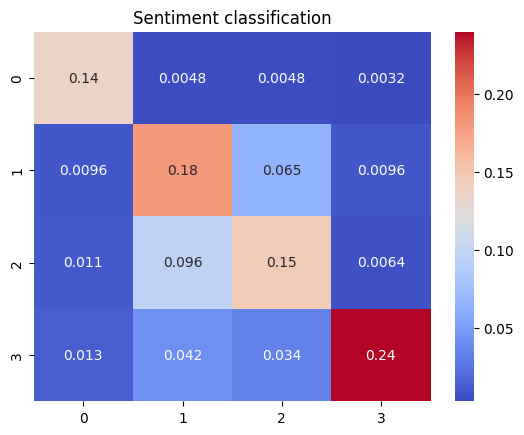

In [64]:
sns.heatmap(confusion_matrix(y_true= labels_flat, y_pred = preds_flat) / len(preds_flat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [65]:
# import joblib
# filename = 'final_model_B.sav'
# joblib.dump(model, filename)

In [66]:
torch.save(model, "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/Bert-based-uncased/model_B")

In [67]:
# torch.save(model.state_dict(), "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/Bert-based-uncased/model_B_stats")

In [68]:
# load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)